In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [256, 256]

train_path = r'E:\Minor Project\PlantVillage(1)\train'
valid_path = r'E:\Minor Project\PlantVillage(1)\val'


In [3]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [5]:
folders = glob(r'E:\Minor Project\PlantVillage(1)\train\*')

In [6]:
x = Flatten()(inception.output)

In [7]:
prediction = Dense(1, activation='sigmoid')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [9]:
from tensorflow.keras import optimizers
import tensorflow as tf
model.compile (loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc',tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.FalsePositives(),tf.keras.metrics.FalseNegatives(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 30591 images belonging to 2 classes.


In [12]:
valid_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 9759 images belonging to 2 classes.


In [13]:
r = model.fit(
  training_set,
  validation_data=valid_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

Epoch 1/20
956/956 [==============================] - 1340s 1s/step - loss: 0.1513 - acc: 0.9406 - true_positives: 9141.0000 - true_negatives: 19632.0000 - false_positives: 847.0000 - false_negatives: 971.0000 - precision: 0.9152 - recall: 0.9040 - val_loss: 0.1193 - val_acc: 0.9535 - val_true_positives: 2979.0000 - val_true_negatives: 6326.0000 - val_false_positives: 417.0000 - val_false_negatives: 37.0000 - val_precision: 0.8772 - val_recall: 0.9877
Epoch 2/20
956/956 [==============================] - 1347s 1s/step - loss: 0.0702 - acc: 0.9737 - true_positives: 9717.0000 - true_negatives: 20068.0000 - false_positives: 411.0000 - false_negatives: 395.0000 - precision: 0.9594 - recall: 0.9609 - val_loss: 0.0744 - val_acc: 0.9732 - val_true_positives: 2967.0000 - val_true_negatives: 6530.0000 - val_false_positives: 213.0000 - val_false_negatives: 49.0000 - val_precision: 0.9330 - val_recall: 0.9838
Epoch 3/20
956/956 [==============================] - 1350s 1s/step - loss: 0.0474 - acc

Epoch 19/20
956/956 [==============================] - 1369s 1s/step - loss: 7.7387e-04 - acc: 0.9999 - true_positives: 10110.0000 - true_negatives: 20477.0000 - false_positives: 2.0000 - false_negatives: 2.0000 - precision: 0.9998 - recall: 0.9998 - val_loss: 0.0707 - val_acc: 0.9805 - val_true_positives: 2935.0000 - val_true_negatives: 6634.0000 - val_false_positives: 109.0000 - val_false_negatives: 81.0000 - val_precision: 0.9642 - val_recall: 0.9731
Epoch 20/20
956/956 [==============================] - 1380s 1s/step - loss: 5.7424e-04 - acc: 0.9999 - true_positives: 10111.0000 - true_negatives: 20478.0000 - false_positives: 1.0000 - false_negatives: 1.0000 - precision: 0.9999 - recall: 0.9999 - val_loss: 0.0715 - val_acc: 0.9804 - val_true_positives: 2912.0000 - val_true_negatives: 6656.0000 - val_false_positives: 87.0000 - val_false_negatives: 104.0000 - val_precision: 0.9710 - val_recall: 0.9655


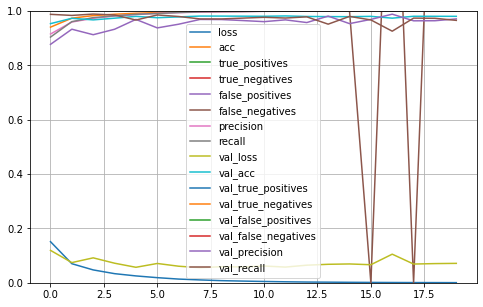

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(r.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

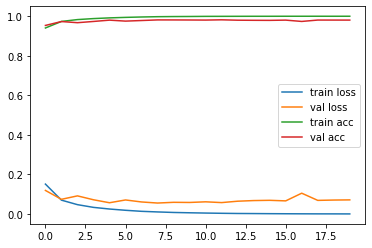

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('loss_acc')

In [16]:
from tensorflow.keras.models import load_model

model.save('model_inception_2Retrain.h5')

In [17]:
test_dir = r'E:\Minor Project\PlantVillage(1)\test'
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory (
                test_dir,
                target_size=(256,256),
                batch_size=32,
                class_mode="binary")

Found 8448 images belonging to 2 classes.


In [18]:
model.evaluate(test_generator)

264/264 [==============================] - 379s 1s/step - loss: 0.0755 - acc: 0.9812 - true_positives: 1879.0000 - true_negatives: 6410.0000 - false_positives: 82.0000 - false_negatives: 77.0000 - precision: 0.9582 - recall: 0.9606


[0.07547369599342346,
 0.9811789989471436,
 1879.0,
 6410.0,
 82.0,
 77.0,
 0.9581845998764038,
 0.9606339335441589]